In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pydotplus
import sys
import os
from IPython.display import Image 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import coremltools
%matplotlib inline

In [3]:
originalData = {
            "age"       : [18, 55, 20, 21, 25, 22, 40, 30, 45, 65, 27, 42, 34, 52, 33, 32, 23, 19, 29, 22, 30, 57, 28, 19, 26, 41, 35, 23, 25, 27, 19, 26, 59, 61, 34, 23, 46, 31, 36, 32, 36, 28, 30, 27, 41, 24, 35, 26, 38, 25, 33, 24, 30, 31, 41, 29, 37, 35, 32, 28, 26, 41, 38, 20, 32, 37, 27, 52, 43, 23, 31, 29, 28, 33, 22, 24, 29, 36, 35, 47],
            "face_score": ["high", "mid", "mid", "mid", "mid", "mid", "mid", "mid", "mid", "mid", "mid", "high", "mid", "mid", "mid", "mid", "mid", "mid", "mid", "mid", "low", "mid", "mid", "mid", "mid", "mid", "mid", "mid", "mid", "mid", "mid", "mid", "mid", "mid", "mid", "high", "mid", "mid", "mid", "mid", "mid", "high", "high", "low", "high", "low", "low", "high", "low", "high", "high", "high", "low", "high", "low", "mid", "low", "high", "high", "mid", "low", "high", "low", "low", "low", "high", "high", "low", "high", "low", "high", "mid", "high", "low", "high", "low", "low", "high", "low", "low"],
            "height"    : [183, 177, 180, 170, 174, 172, 178, 173, 174, 172, 188, 175, 181, 150, 182, 176, 177, 184, 162, 170, 181, 163, 175, 185, 177, 186, 180, 152, 174, 180, 170, 187, 182, 171, 175, 169, 183, 181, 179, 160, 176, 159, 178, 171, 181, 182, 188, 176, 171, 170, 173, 168, 179, 170, 182, 177, 178, 165, 175, 179, 174, 172, 178, 181, 178, 182, 172, 180, 178, 177, 173, 164, 182, 171, 184, 166, 167, 178, 167, 170],
            "weight"    : [70, 72, 180, 65, 63, 75, 64, 62, 67, 80, 71, 67, 70, 65, 70, 71, 60, 71, 80, 71, 171, 71, 65, 70, 67, 75, 64, 55, 60, 62, 60, 70, 67, 70, 130, 72, 70, 152, 71, 61, 62, 51, 68, 59, 70, 70, 75, 62, 60, 55, 60, 55, 65, 59, 65, 60, 67, 53, 65, 80, 100, 60, 61, 60, 64, 66, 65, 80, 70, 71, 61, 58, 73, 80, 70, 75, 77, 69, 72, 74],
            "salary"    : [3000, 1200, 2100, 15000, 3500, 7000, 12000, 4000, 2000, 2000, 16200, 14000, 17700, 5000, 4600, 15300, 19200, 4100, 2199, 6000, 2450, 2305, 6600, 5200, 1200, 5600, 18900, 6200, 5100, 14900, 8139, 9075, 8750, 5560, 4500, 9600, 7600, 4500, 8000, 6100, 7500, 17800, 9000, 4100, 5000, 21000, 9400, 12000, 6500, 7000, 4000, 22000, 16900, 7900, 4300, 7000, 6700, 7900, 8100, 8000, 5700, 6900, 4000, 3000, 17900, 19000, 8900, 5000, 23000, 8900, 15000, 4600, 18900, 4500, 9000, 2700, 4200, 12000, 3600, 4700],
            "category"  : ["good", "bad", "bad", "good", "intermediate", "intermediate", "good", "intermediate", "bad", "bad", "good", "good", "good", "bad", "intermediate", "good", "good", "good", "bad", "intermediate", "bad", "bad", "intermediate", "good", "bad", "intermediate", "good", "bad", "intermediate", "good", "intermediate", "good", "intermediate", "bad", "bad", "intermediate", "intermediate", "bad", "intermediate", "bad", "intermediate", "bad", "good", "bad", "good", "good", "intermediate", "good", "bad", "intermediate", "good", "good", "intermediate", "good", "intermediate", "intermediate", "bad", "intermediate", "good", "intermediate", "bad", "good", "bad", "bad", "intermediate", "good", "good", "bad", "good", "intermediate", "good", "bad", "good", "bad", "good", "bad", "bad", "good", "bad", "bad"]
        }


data = pd.DataFrame(originalData)
data.loc[data["category"]=="intermediate", "category"] = "average"
data.loc[data["category"]=="bad", "category"] = "poor"
data.loc[data["face_score"]=="high", "face_score"] = 100
data.loc[data["face_score"]=="mid", "face_score"] = 50
data.loc[data["face_score"]=="low", "face_score"] = 0

data["salary"] = data.salary * 3.1
data

,age,face_score,height,weight,salary,category
0,18,100,183,70,9300.0,good
1,55,50,177,72,3720.0,poor
2,20,50,180,180,6510.0,poor
3,21,50,170,65,46500.0,good
4,25,50,174,63,10850.0,average
...,...,...,...,...,...,...
75,24,0,166,75,8370.0,poor
76,29,0,167,77,13020.0,poor
77,36,100,178,69,37200.0,good
78,35,0,167,72,11160.0,poor


In [4]:
X = data.iloc[:, : -1]
y = data["category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
clf = DecisionTreeClassifier(criterion="entropy", class_weight=None, max_depth=7)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [6]:
clf.classes_

array(['average', 'good', 'poor'], dtype=object)

In [7]:
clf.score(X_test, y_test)

0.75

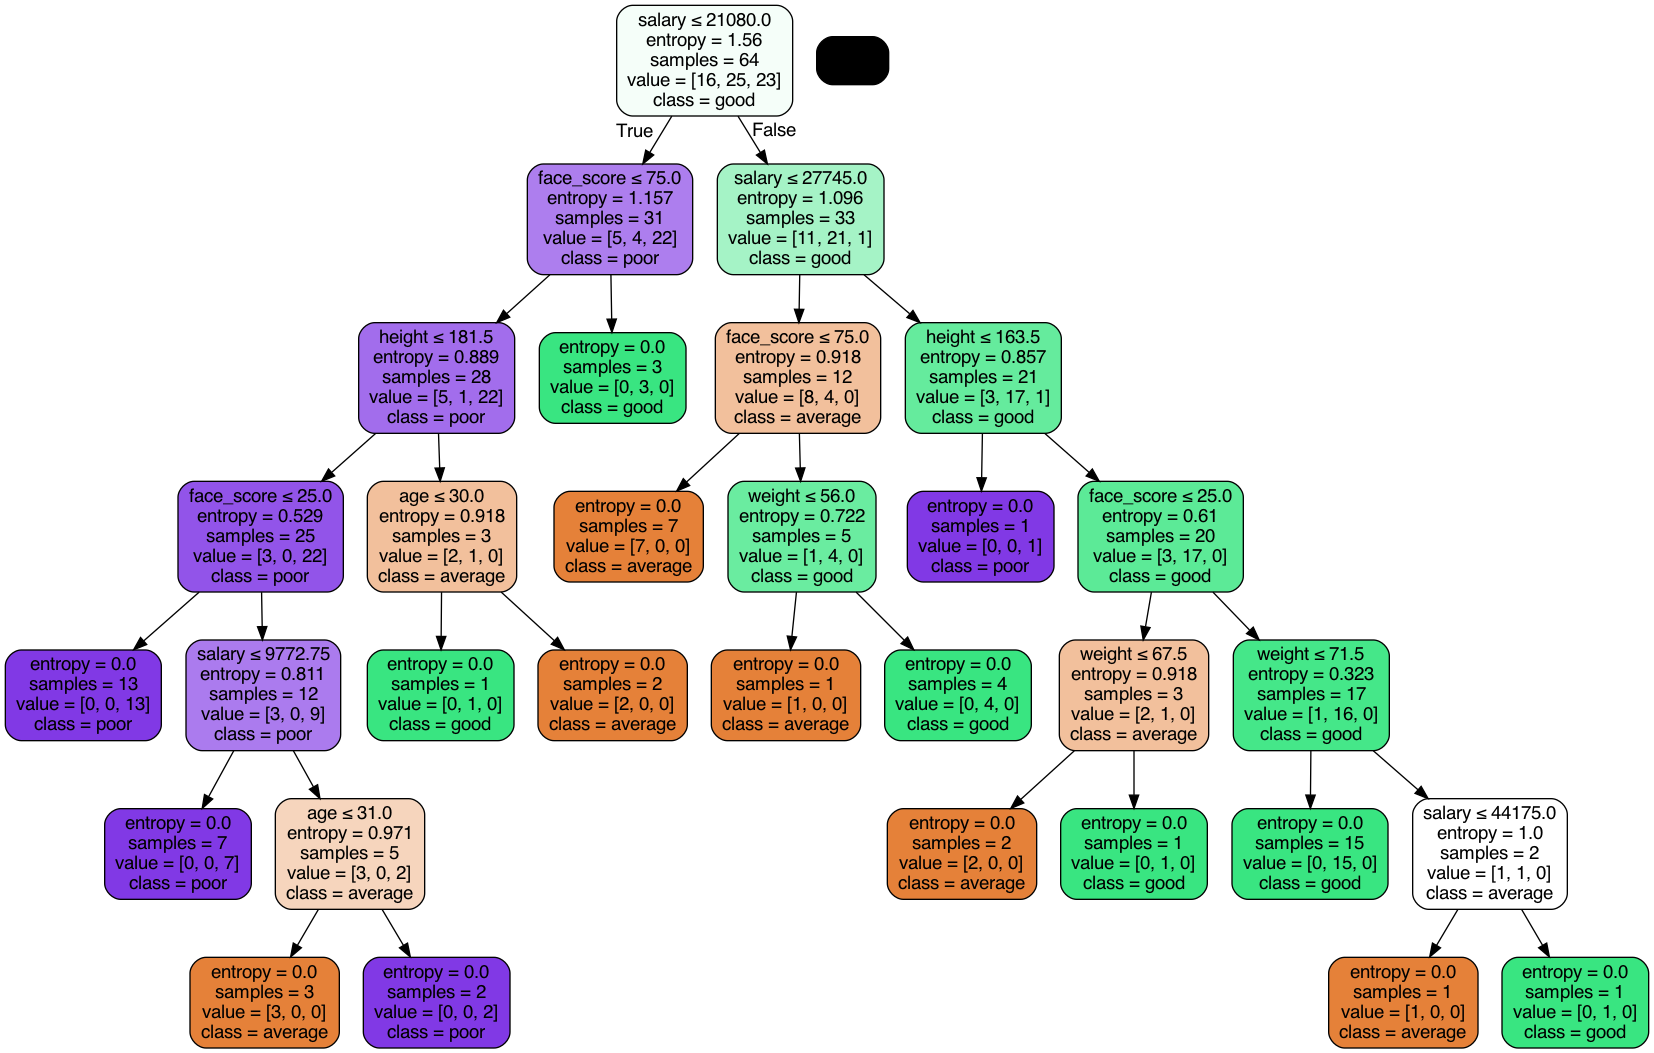

In [8]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=["age", "face_score", "height", "weight", "salary"],  
                         class_names=clf.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

In [9]:
coreml_model = coremltools.converts

AttributeError: module 'coremltools' has no attribute 'converts'